# **Author Name:** Vangari Prashanth
# **Student Id:** 11645119

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Task 1: Data preparation (2 points)

In [29]:
def getData(filename):
  canData=[] #List to store CAN data
  f = open(filename)
  #read_file = reader(f)
  read_file =f.readlines()

  #file = list(read_file)
  speed = []
  rpm = []
  i = 0
  for row in read_file:
    #Change the positions of the values if needed
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33],
'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}

    if record["PID"] == '254': #Processing of speed
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      speed.append(record['value'])

    if record["PID"] == '115': #Processing of RPM
      if record["value"] >= 65535:
        record["attack"] = 1
      record['value'] =  (record['value'] * 2)
      rpm.append(record['value'])

    i = i+1
    canData.append(record)
    record={}

  f.close()
  return canData


In [30]:
def dict_to_df(dict):

  #load dictionary to dataframe
  df = pd.DataFrame.from_dict(dict)
  df = df.drop(columns=['stamp','const1','change','value2'])
  df = df.loc[(df['PID'] == '115') | (df['PID'] == '254')]
  df = df.reset_index(drop=True)
  one_hot = pd.get_dummies(df['PID'])
  df = df.drop('PID',axis = 1)
  df = df.join(one_hot)
  df = df[['115', '254', 'value', 'attack']]
  df.rename(columns = {'115':'RPM', '254':'Speed'}, inplace = True)
  df.loc[df['RPM'] == 1, 'RPM'] = df['value']
  df.loc[df['Speed'] == 1, 'Speed'] = df['value']
  df = df.drop(columns=['value'])

  return df


In [31]:
#edit file name with file directory of downloaded log files
fff_injection_df = dict_to_df(getData("CAN Bus log - injection of FFF as the speed reading.log"))
rpm_injection_df = dict_to_df(getData("CAN Bus log - injection of RPM readings.log"))
no_injection_df = dict_to_df(getData("CAN bus log - no injection of messages.log"))

# Task 2:  Explore and analyze the data (12 points)

Step 1

Text(0.5, 1.0, 'Scatter Plot of Speed Over Time (FFF Injection)')

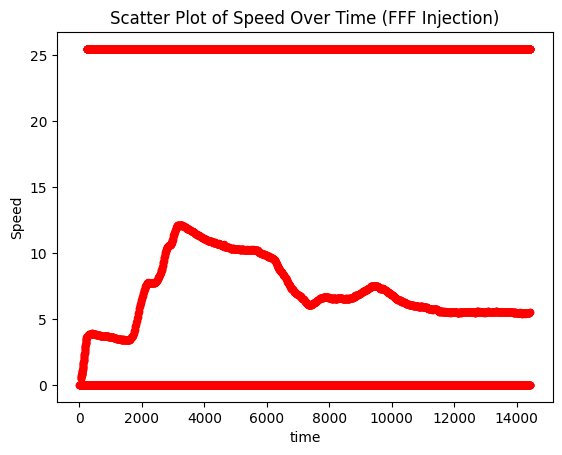

In [32]:
#Scatter plot Scatter Plot of Speed Over Time (FFF Injection)
fff_injection_df['time']=fff_injection_df.index
fff_injection_df.plot.scatter(x='time',y='Speed', c='r')
plt.title('Scatter Plot of Speed Over Time (FFF Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Time (FFF Injection)')

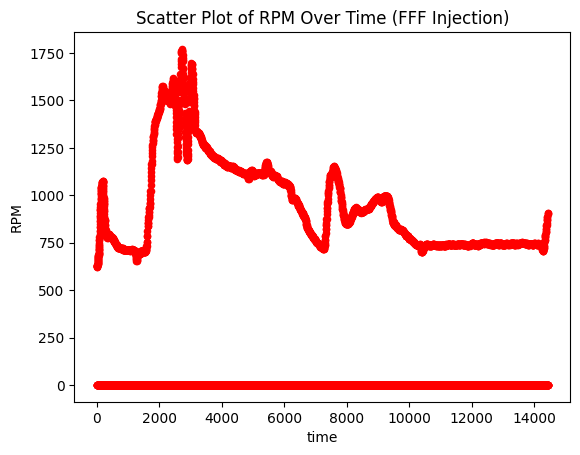

In [33]:
#Scatter Plot of RPM Over Time (FFF Injection)
fff_injection_df.plot.scatter(x='time',y='RPM', c='r')
plt.title('Scatter Plot of RPM Over Time (FFF Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Speed (FFF Injection)')

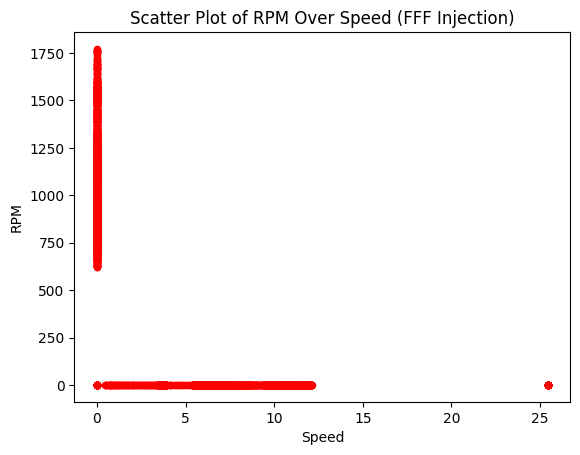

In [34]:
#Scatter Plot of RPM Over Speed (FFF Injection)
fff_injection_df.plot.scatter(x='Speed',y='RPM', c='r')
plt.title('Scatter Plot of RPM Over Speed (FFF Injection)')

Text(0.5, 1.0, 'Scatter Plot of Speed Over Time (RPM Injection)')

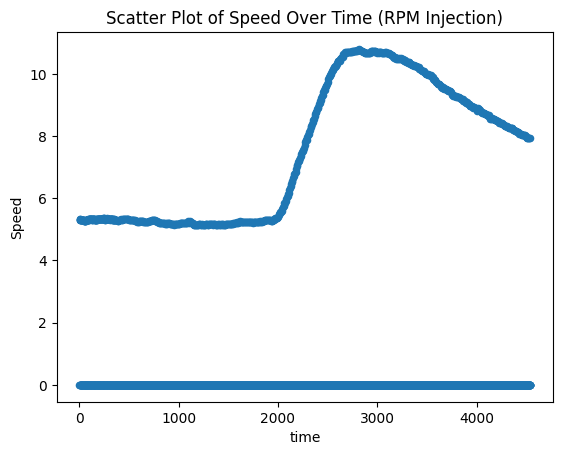

In [35]:
#Scatter Plot of Speed Over Time (RPM Injection)
rpm_injection_df['time']=rpm_injection_df.index
rpm_injection_df.plot.scatter(x='time',y='Speed')
plt.title('Scatter Plot of Speed Over Time (RPM Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Time (RPM Injection)')

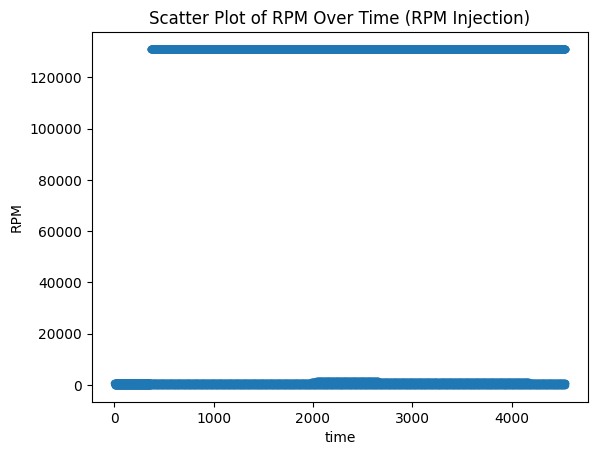

In [36]:
#Scatter Plot of RPM Over Time (RPM Injection)
rpm_injection_df.plot.scatter(x='time',y='RPM')
plt.title('Scatter Plot of RPM Over Time (RPM Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Speed (RPM Injection)')

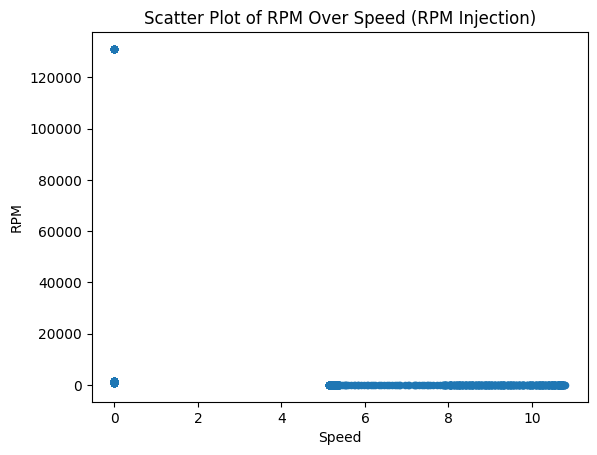

In [37]:
#Scatter Plot of RPM Over Speed (RPM Injection)
rpm_injection_df.plot.scatter(x='Speed',y='RPM')
plt.title('Scatter Plot of RPM Over Speed (RPM Injection)')

Text(0.5, 1.0, 'Scatter Plot of Speed Over Time (No Injection)')

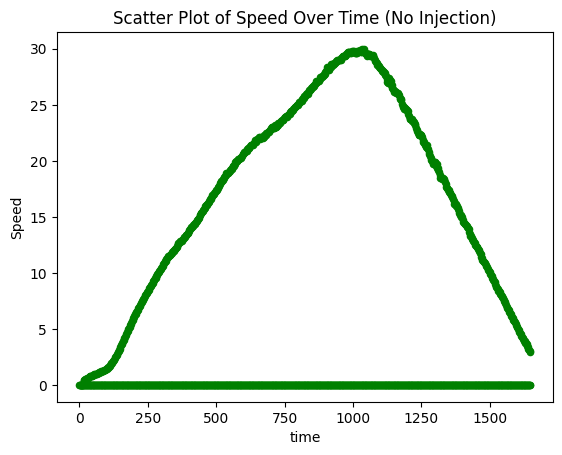

In [38]:
#Scatter Plot of Speed Over Time (No Injection)
no_injection_df['time']=no_injection_df.index
no_injection_df.plot.scatter(x='time',y='Speed',c='g')
plt.title('Scatter Plot of Speed Over Time (No Injection)')

Text(0.5, 1.0, 'Scatter Plot of Time Over RPM (No Injection)')

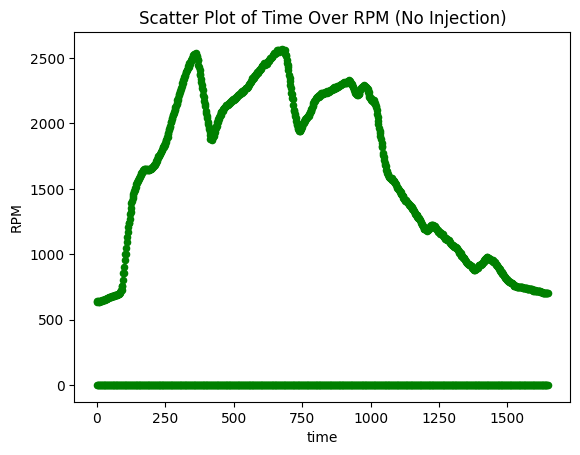

In [39]:
#Scatter Plot of Time Over RPM (No Injection)
no_injection_df.plot.scatter(x='time',y='RPM', c='g')
plt.title('Scatter Plot of Time Over RPM (No Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Speed (No Injection)')

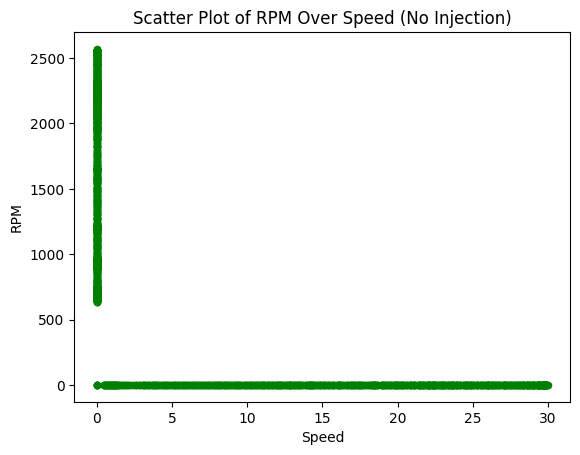

In [40]:
#Scatter Plot of RPM Over Speed (No Injection)
no_injection_df.plot.scatter(x='Speed',y='RPM', c='g')
plt.title('Scatter Plot of RPM Over Speed (No Injection)')


**observations**

1. **Change of Speed Over Time**:
   - In the FFF injection graph, we see that speed readings show some fluctuations. These could be due to the injection of false data.
   - In the RPM Injection graph, there are also fluctuations, but they appear to be very less when compared to FFF Injection graph.
   - In the No Injection graph, speed readings are relatively stable. This indicates normal vehicle operation with minimal fluctuations.

2. **Change of RPM Over Time**:
   - In the FFF Injection graph, RPM readings show few variations, which may be occurred due to the presence of false data.
   - In the RPM Injection graph, RPM readings show fluctuations as well, but they appear to be less severe and more regular compared to the FFF Injection graph.
   - In the No Injection scenario, RPM readings remain relatively stable. This indicates typical engine operation with minor variations.

3. **Relationship Between Speed and RPM**:
   - In all three scenarios, the scatter plots of speed vs. RPM reveal a positive linear relationship between these two parameters. As speed increases, RPM tends to increase as well, which is consistent with the behavior of a typical vehicle engine.
   - However, in the FFF Injection and RPM Injection scenarios, there are noticeable outliers and disruptions in the linear relationship. These anomalies likely correspond to the injection of false data.
   - In the No Injection scenario, the speed vs. RPM plot shows a smoother and more consistent linear relationship, reflecting normal vehicle behavior without external interference.

Step2

Text(0.5, 0, 'time')

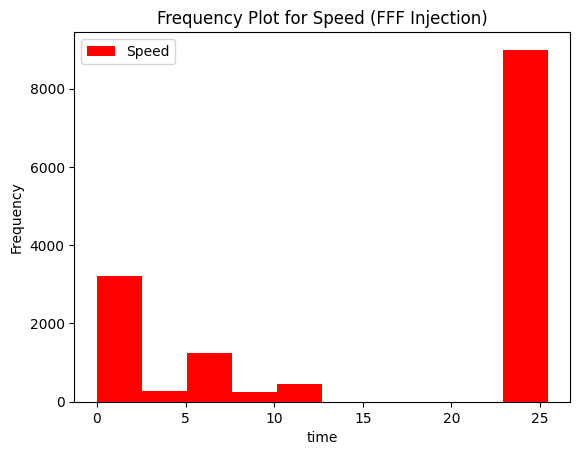

In [41]:
#Frequency Plot for Speed (FFF Injection)
fff_injection_df.plot.hist(x='time',y='Speed', color ='red')
plt.title('Frequency Plot for Speed (FFF Injection)')
plt.xlabel('time')

Text(0.5, 0, 'time')

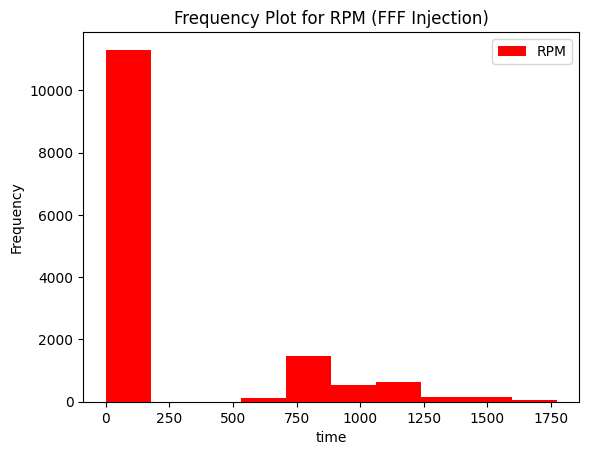

In [42]:
#Frequency Plot for RPM (FFF Injection)
fff_injection_df.plot.hist(x='time',y='RPM', color ='red')
plt.title('Frequency Plot for RPM (FFF Injection)')
plt.xlabel('time')

Observation

Text(0.5, 0, 'time')

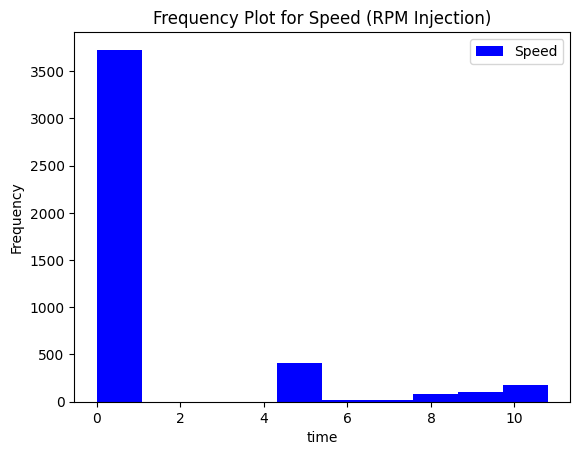

In [43]:
#Frequency Plot for Speed (RPM Injection)
rpm_injection_df.plot.hist(x='time',y='Speed', color = 'blue')
plt.title('Frequency Plot for Speed (RPM Injection)')
plt.xlabel('time')

Text(0.5, 0, 'time')

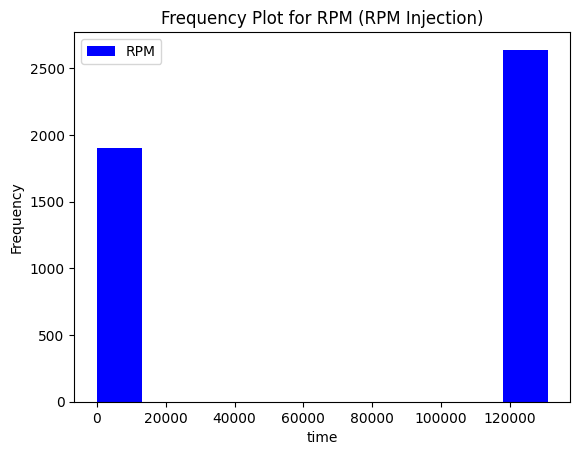

In [44]:
#Frequency Plot for RPM (RPM Injection)
rpm_injection_df.plot.hist(x='time',y='RPM', color = 'blue')
plt.title('Frequency Plot for RPM (RPM Injection)')
plt.xlabel('time')

Observation

Text(0.5, 0, 'time')

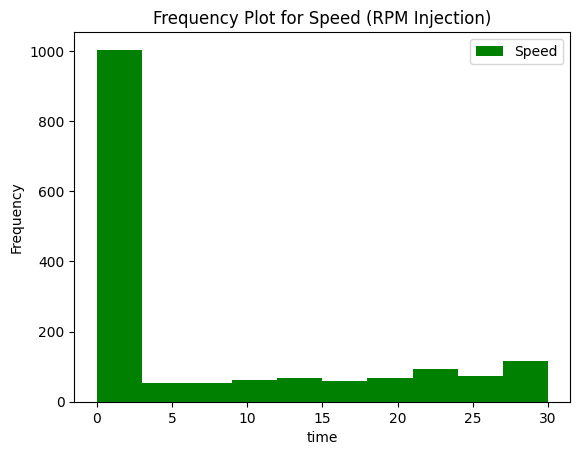

In [45]:
#Frequency Plot for Speed (RPM Injection)
no_injection_df.plot.hist(x='time',y='Speed', color = 'green')
plt.title('Frequency Plot for Speed (RPM Injection)')
plt.xlabel('time')

Text(0.5, 0, 'time')

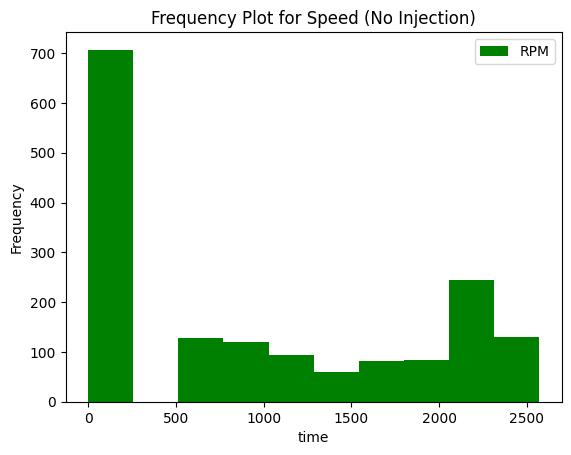

In [46]:
#Frequency Plot for Speed (No Injection)
no_injection_df.plot.hist(x='time',y='RPM', color = 'green')
plt.title('Frequency Plot for Speed (No Injection)')
plt.xlabel('time')

Observations

In [47]:
#dropping the time columns as we do not require them for training the ML models
no_injection_df.drop('time', axis=1, inplace=True)
rpm_injection_df.drop('time', axis=1, inplace=True)
fff_injection_df.drop('time', axis=1, inplace=True)

**Step3**

In [48]:
# Correlation Table
from scipy.stats import pearsonr
corr_fffi = pearsonr(fff_injection_df['Speed'], fff_injection_df['RPM'])
corr_rpmi = pearsonr(rpm_injection_df['Speed'], rpm_injection_df['RPM'])
corr_noi = pearsonr(no_injection_df['Speed'], no_injection_df['RPM'])


correlation_table = pd.DataFrame({
    'Scenario': ['FFF Injection', 'RPM Injection', 'No Injection'],
    'Correlation Coefficient': [corr_fffi[0], corr_rpmi[0], corr_noi[0]],
    'P-Value': [corr_fffi[1], corr_rpmi[1], corr_noi[1]]
})


print(correlation_table)


        Scenario  Correlation Coefficient        P-Value
0  FFF Injection                -0.768675   0.000000e+00
1  RPM Injection                -0.526325  3.162020e-322
2   No Injection                -0.704439  1.700339e-247


**Observation:**
1.   For "FFF Injection," the correlation coefficient is approximately -0.769. This indicates a strong negative correlation between the Speed and RPM.
2. For "RPM Injection," the correlation coefficient is approximately -0.526. This also indicates a negative correlation, but it is not as strong as the correlation in the "FFF Injection" scenarion.
3. For "No Injection," the correlation coefficient is approximately -0.704, indicating a strong negative correlation as well.

**P - Value**

All the p-values from the above table is very less ( Close to zero) which means that the correlations observed in all three scenarios are statistically significant, and the probability of these correlations occurring by random chance is virtually zero.

# Task 3 - Supervised Machine Learning Model (20 points)

In [49]:
#Combined data set from three data frames
combined_dataset = pd.concat([fff_injection_df, rpm_injection_df, no_injection_df], ignore_index=True)


In [50]:
#Splitting the data set into train(3/4th) and test(1/4th).
from sklearn.model_selection import train_test_split

X = combined_dataset[['Speed', 'RPM']]  #Input variables
y = combined_dataset['attack']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [51]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
# Predict on the test dataset
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("\n")
# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Confusion Matrix:
[[2212    0]
 [   0 2945]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      2945

    accuracy                           1.00      5157
   macro avg       1.00      1.00      1.00      5157
weighted avg       1.00      1.00      1.00      5157



# Task 4 Second Choice of ML model (20 points)

In [53]:
# Create and train the Logistic Regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [54]:
# Predict on the test dataset
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("\n")
# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[2207    5]
 [   0 2945]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      2945

    accuracy                           1.00      5157
   macro avg       1.00      1.00      1.00      5157
weighted avg       1.00      1.00      1.00      5157



# Task 5- Compare and contrast models trained on Tasks 3 and 4 (8 points)

In Tasks 3 and 4, I applied two different machine learning models, Random Forest (Task 3) and Logistic Regression (Task 4). To compare these models, we will analyze their performance based on the confusion matrices.

The true positives for both machine learning models (Random Forest Classifier and Logistic Regression) are same and they are 100%.

The true negatives for both machine learning models are also same and they are 100%.

The False positives for logistic regression is 5 which means logistic regression has identified that there is an attack even though there is no attack. However, Random Forest did not identify as an attack when there is no attack.

Again, the true negatives for both the models are same and they are 100%. This means that both the logistic regression and Random Forest has shown 100% output in predicting that there is no attack when there is no attack actually.

In summary, I would choose **Random Forest** becuase it has no false positives and the rest of the metrics is 100% percent.

# Task 6 -Discussion (10 points)

This assignment provided valuable insights into the application of supervised machine learning to detect potential attacks in vehicle data. There are few short comings.
1. **Imbalanced Data**: One significant challenge was dealing with potentially imbalanced data. The number of non-attacks significantly outweighs attacks. This can lead to models being biased towards the majority class and potentially missing rare attacks. To solve this, techniques like oversampling the minority class or using different evaluation metrics such as precision-recall curves could be used.

2. **Anomaly Detection**: While supervised ML is a valuable approach, it may not be the best choice for anomaly detection in all cases. Anomaly detection algorithms, like isolation forests or one-class SVMs, could be more suitable for identifying rare attacks without relying on labeled data.

Improving the performance of models for attack detection in vehicle data involves addressing data imbalance, exploring a broader range of models, enhancing feature engineering, optimizing hyperparameters, and considering alternative approaches like anomaly detection.